In [3]:
import numpy as np
import cv2
from scipy.signal import find_peaks

def load_image(image_path):
    # Load the TEM image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    return image

def preprocess_image(image):
    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred

def find_peaks_1d(signal, distance=10):
    # Find peaks in a 1D signal array
    peaks, _ = find_peaks(signal, distance=distance)
    return peaks

def peak_pair_analysis(image):
    # Assume the peaks are to be found along each row (or column)
    rows, cols = image.shape
    peak_positions = []
    
    for i in range(rows):
        row_data = image[i, :]
        peaks = find_peaks_1d(row_data)
        peak_positions.append(peaks)
    
    return peak_positions

def calculate_strain(peaks, reference_peaks):
    # Calculate strain based on peak positions and reference peak positions
    strain = (np.array(peaks) - np.array(reference_peaks)) / np.array(reference_peaks)
    return strain

def perform_strain_mapping(image_path, reference_image_path):
    # Load and preprocess the images
    image = load_image(image_path)
    reference_image = load_image(reference_image_path)
    
    preprocessed_image = preprocess_image(image)
    preprocessed_reference_image = preprocess_image(reference_image)
    
    # Perform Peak Pair Analysis on both images
    image_peaks = peak_pair_analysis(preprocessed_image)
    reference_peaks = peak_pair_analysis(preprocessed_reference_image)
    
    # Calculate strain for each row of peaks
    strain_map = []
    for img_peaks, ref_peaks in zip(image_peaks, reference_peaks):
        if len(img_peaks) == len(ref_peaks):
            strain = calculate_strain(img_peaks, ref_peaks)
            strain_map.append(strain)
        else:
            strain_map.append(np.zeros_like(img_peaks))
    
    return np.array(strain_map)

def main():
    # Define the paths to the TEM image and reference image
    image_path = "2below.png"
    reference_image_path = "unStrain.png"
    
    # Perform strain mapping
    strain_map = perform_strain_mapping(image_path, reference_image_path)
    
    # Print or visualize the strain map
    print("Strain Map:", strain_map)
    cv2.imshow("Strain Map", strain_map)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (169,) + inhomogeneous part.

In [5]:
import numpy as np
import cv2
from scipy.signal import find_peaks

def load_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    return image

def preprocess_image(image):
    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred

def find_peaks_1d(signal, distance=10):
    # Find peaks in a 1D signal array
    peaks, _ = find_peaks(signal, distance=distance)
    return peaks

def peak_pair_analysis(image):
    # Assume the peaks are to be found along each row (or column)
    rows, cols = image.shape
    peak_positions = []
    
    for i in range(rows):
        row_data = image[i, :]
        peaks = find_peaks_1d(row_data)
        peak_positions.append(peaks)
    
    return peak_positions

def calculate_strain(peaks, reference_peaks):
    # Calculate strain based on peak positions and reference peak positions
    strain = (np.array(peaks) - np.array(reference_peaks)) / np.array(reference_peaks)
    return strain

def perform_strain_mapping(image_path, reference_image_path):
    # Load and preprocess the images
    image = load_image(image_path)
    reference_image = load_image(reference_image_path)
    
    preprocessed_image = preprocess_image(image)
    preprocessed_reference_image = preprocess_image(reference_image)
    
    # Perform Peak Pair Analysis on both images
    image_peaks = peak_pair_analysis(preprocessed_image)
    reference_peaks = peak_pair_analysis(preprocessed_reference_image)
    
    # Calculate strain for each row of peaks
    strain_map = []
    for img_peaks, ref_peaks in zip(image_peaks, reference_peaks):
        if len(img_peaks) == len(ref_peaks):
            strain = calculate_strain(img_peaks, ref_peaks)
            strain_map.append(strain)
        else:
            # Handle cases where the number of peaks do not match
            min_len = min(len(img_peaks), len(ref_peaks))
            img_peaks = img_peaks[:min_len]
            ref_peaks = ref_peaks[:min_len]
            strain = calculate_strain(img_peaks, ref_peaks)
            strain_map.append(strain)
    
    # Pad the rows to ensure uniform length
    max_length = max(len(row) for row in strain_map)
    strain_map_padded = np.array([np.pad(row, (0, max_length - len(row)), 'constant') for row in strain_map])
    
    return strain_map_padded

def main():
    # Define the paths to the TEM image and reference image
    image_path = "C:/Users/user/Desktop/unStrain.png"
    reference_image_path = "C:/Users/user/Desktop/reference.png"
    
    # Perform strain mapping
    strain_map = perform_strain_mapping(image_path, reference_image_path)
    
    # Print or visualize the strain map
    print("Strain Map:", strain_map)
    cv2.imshow("Strain Map", strain_map)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


ValueError: Image at path C:/Users/user/Desktop/reference.png could not be loaded.

In [9]:
import numpy as np
import cv2
from scipy.signal import find_peaks

def load_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    return image

def preprocess_image(image):
    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred

def find_peaks_1d(signal, distance=10):
    # Find peaks in a 1D signal array
    peaks, _ = find_peaks(signal, distance=distance)
    return peaks

def peak_pair_analysis(image):
    # Assume the peaks are to be found along each row (or column)
    rows, cols = image.shape
    peak_positions = []
    
    for i in range(rows):
        row_data = image[i, :]
        peaks = find_peaks_1d(row_data)
        peak_positions.append(peaks)
    
    return peak_positions

def calculate_strain(peaks, reference_peaks):
    # Calculate strain based on peak positions and reference peak positions
    strain = (np.array(peaks) - np.array(reference_peaks)) / np.array(reference_peaks)
    return strain

def perform_strain_mapping(image_path, reference_image_path):
    # Load and preprocess the images
    image = load_image(image_path)
    reference_image = load_image(reference_image_path)
    
    preprocessed_image = preprocess_image(image)
    preprocessed_reference_image = preprocess_image(reference_image)
    
    # Perform Peak Pair Analysis on both images
    image_peaks = peak_pair_analysis(preprocessed_image)
    reference_peaks = peak_pair_analysis(preprocessed_reference_image)
    
    # Calculate strain for each row of peaks
    strain_map = []
    for img_peaks, ref_peaks in zip(image_peaks, reference_peaks):
        if len(img_peaks) == len(ref_peaks):
            strain = calculate_strain(img_peaks, ref_peaks)
            strain_map.append(strain)
        else:
            # Handle cases where the number of peaks do not match
            min_len = min(len(img_peaks), len(ref_peaks))
            img_peaks = img_peaks[:min_len]
            ref_peaks = ref_peaks[:min_len]
            strain = calculate_strain(img_peaks, ref_peaks)
            strain_map.append(strain)
    
    # Pad the rows to ensure uniform length
    max_length = max(len(row) for row in strain_map)
    strain_map_padded = np.array([np.pad(row, (0, max_length - len(row)), 'constant') for row in strain_map])
    
    return strain_map_padded

def main():
    # Define the paths to the TEM image and reference image
    image_path = "2below.png"
    reference_image_path = "unStrain.png"
    
    # Perform strain mapping
    strain_map = perform_strain_mapping(image_path, reference_image_path)
    
    # Print or visualize the strain map
    print("Strain Map:", strain_map)
    cv2.imshow("Strain Map", strain_map)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Strain Map: [[ 0.66666667  0.92307692  0.41935484 ...  0.11564626  0.04819277
   0.        ]
 [ 0.66666667  0.40909091  0.375      ...  0.11564626  0.04819277
   0.        ]
 [ 2.          1.          0.40625    ...  0.18367347  0.22292994
   0.21556886]
 ...
 [ 1.83333333  0.25        0.27906977 ...  0.33544304  0.
   0.        ]
 [ 0.7         0.20689655  0.43589744 ...  0.1         0.
   0.        ]
 [ 0.8         0.24137931 -0.01754386 ...  0.          0.
   0.        ]]


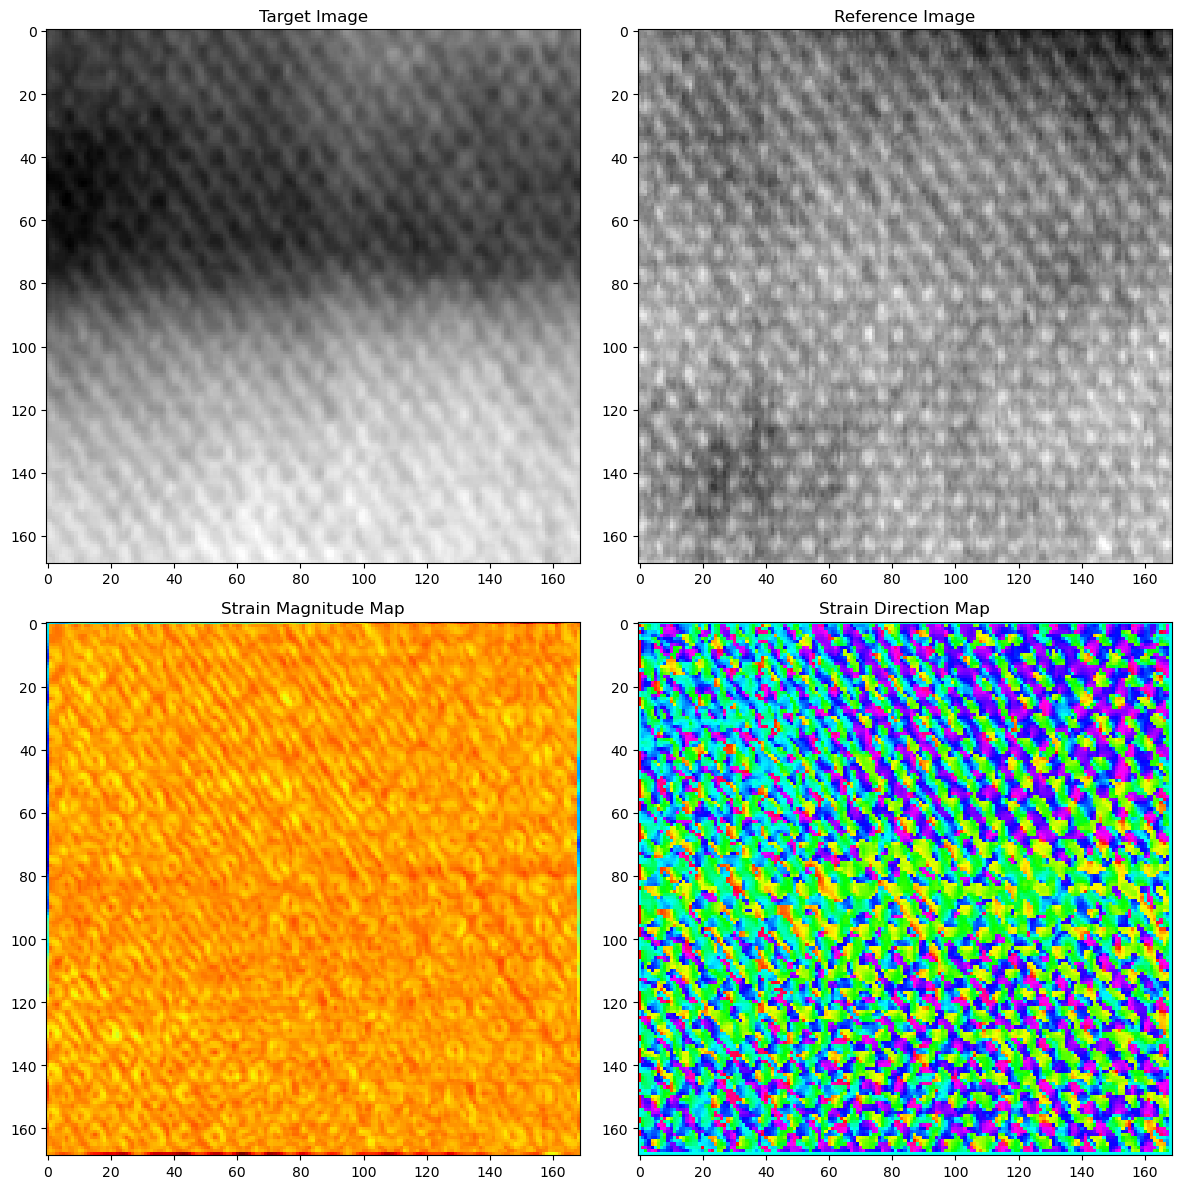

In [15]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    return image

def preprocess_image(image):
    # Apply Gaussian blur to smooth the image
    blurred = gaussian_filter(image, sigma=1)
    return blurred

def calculate_gradient(image):
    # Sobel filter to calculate gradient
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    gradient_x = convolve2d(image, sobel_x, mode='same')
    gradient_y = convolve2d(image, sobel_y, mode='same')
    
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)
    
    return gradient_magnitude, gradient_direction

def perform_ppa(image_path, reference_image_path):
    # Load and preprocess the target image
    target_image = load_image(image_path)
    preprocessed_target = preprocess_image(target_image)
    
    # Calculate gradient of the target image
    target_gradient_magnitude, target_gradient_direction = calculate_gradient(preprocessed_target)
    
    # Load and preprocess the reference image
    reference_image = load_image(reference_image_path)
    preprocessed_reference = preprocess_image(reference_image)
    
    # Calculate gradient of the reference image
    reference_gradient_magnitude, reference_gradient_direction = calculate_gradient(preprocessed_reference)
    
    # Calculate strain based on the difference in gradients
    strain_magnitude = target_gradient_magnitude - reference_gradient_magnitude
    strain_direction = target_gradient_direction - reference_gradient_direction
    
    return strain_magnitude, strain_direction

def plot_strain_maps(image_path, reference_image_path, strain_magnitude, strain_direction):
    # Load the original target and reference images
    target_image = load_image(image_path)
    reference_image = load_image(reference_image_path)
    
    # Plot the original images and strain maps
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    axes[0, 0].imshow(target_image, cmap='gray')
    axes[0, 0].set_title('Target Image')
    
    axes[0, 1].imshow(reference_image, cmap='gray')
    axes[0, 1].set_title('Reference Image')
    
    axes[1, 0].imshow(strain_magnitude, cmap='jet')
    axes[1, 0].set_title('Strain Magnitude Map')
    
    axes[1, 1].imshow(strain_direction, cmap='hsv')
    axes[1, 1].set_title('Strain Direction Map')
    
    plt.tight_layout()
    plt.show()

def main():
    # Define the paths to the target image and reference image
    target_image_path = "capp.png"
    reference_image_path ="unStrain.png"
    
    # Perform strain analysis using PPA
    strain_magnitude, strain_direction = perform_ppa(target_image_path, reference_image_path)
    
    # Plot the strain maps
    plot_strain_maps(target_image_path, reference_image_path, strain_magnitude, strain_direction)

if __name__ == "__main__":
    main()
